# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [8]:
import pandas as pd

In [24]:
from _conf import EXTENDED_BASELINE_DATA, PREPROCESSED_RESULTS
samplns_data = pd.read_json(PREPROCESSED_RESULTS)
baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)

In [25]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
#best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound

,instance_name,best_lower_bound
0,APL,7
1,APL-Model,8
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1851
8,FameDB,8
9,FeatureIDE,7


In [26]:
# Fetch external lower bounds, that might be better than the ones we have.
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,28,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,10,8.0
7,EMBToolkit,1872,1851.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [29]:
samplns_data = samplns_data[["instance_name", "lower_bound",  "upper_bound", "baseline_alg", "baseline_alg_conf"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
# How many percent is the solution above the best lower bound?
samplns_data["gap"] = 100 * (
    ( samplns_data["upper_bound"]/samplns_data["best_lower_bound"]-1)
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data.groupby(["instance_name", "baseline_alg", "baseline_alg_conf"])[["lower_bound", "upper_bound", "gap"]].mean()

lower_bound  \
instance_name               baseline_alg baseline_alg_conf                
APL                         FIDE-YASA    t2_m1_null            7.000000   
APL-Model                   FIDE-YASA    t2_m1_null            8.000000   
BankingSoftware             FIDE-YASA    t2_m10_null          28.000000   
                                         t2_m1_null           28.000000   
BattleofTanks               FIDE-YASA    t2_m1_null          256.000000   
ChatClient                  FIDE-YASA    t2_m1_null            7.000000   
DMIE                        FIDE-YASA    t2_m1_null           16.000000   
E-Shop                      FIDE-YASA    t2_m1_null            7.800000   
EMBToolkit                  FIDE-YASA    t2_m1_null         1567.200000   
FameDB                      FIDE-YASA    t2_m1_null            8.000000   
                            Incling      t2                    8.000000   
FeatureIDE                  FIDE-YASA    t2_m1_null            7.000000   
FreeBSD-8_0_0               FIDE-YASA    t2_m10_null          28.000000   
                                         t2_m1_null           25.200000   
PPU                         FIDE-YASA    t2_m1_null           12.000000   
SafeBali                    FIDE-YASA    t2_m1_null           10.400000   
SortingLine                 FIDE-YASA    t2_m1_null            9.000000   
                            Incling      t2                    9.000000   
TightVNC                    FIDE-YASA    t2_m10_null           8.000000   
                                         t2_m1_null            8.000000   
Violet                      FIDE-YASA    t2_m1_null           14.000000   
WaterlooGenerated           FIDE-YASA    t2_m1_null           80.600000   
XSEngine                    FIDE-YASA    t2_m1_null           27.666667   
aaed2000                    FIDE-YASA    t2_m1_null           49.000000   
am31_sim                    FIDE-YASA    t2_m1_null           24.000000   
atlas_mips32_4kc            FIDE-YASA    t2_m1_null           28.600000   
axTLS                       FIDE-YASA    t2_m1_null           10.000000   
berkeleyDB1                 FIDE-YASA    t2_m1_null           15.000000   
berkeleyDB2                 FIDE-YASA    t2_m1_null           11.000000   
busybox-1_18_0              FIDE-YASA    t2_m1_null           12.000000   
busybox-1_29_2              FIDE-YASA    t2_m1_null           16.600000   
busybox_2007-01-24_09-14-09 FIDE-YASA    t2_m1_null           21.000000   
busybox_2020-12-16_21-53-05 FIDE-YASA    t2_m1_null           16.600000   
calculate                   FIDE-YASA    t2_m1_null            5.000000   
car                         FIDE-YASA    t2_m1_null            5.000000   
dell                        FIDE-YASA    t2_m1_null           31.000000   
eCos-3-0_i386pc             FIDE-YASA    t2_m1_null           28.000000   
ea2468                      FIDE-YASA    t2_m1_null           28.200000   
email                       FIDE-YASA    t2_m1_null            6.000000   
fiasco_2017-09-26_11-30-56  FIDE-YASA    t2_m1_null          222.600000   
                            Incling      t2                  222.000000   
fiasco_2020-12-01_14-09-14  FIDE-YASA    t2_m1_null          195.500000   
financial_services          FIDE-YASA    t2_m1_null         4119.500000   
fs_2017-05-22               FIDE-YASA    t2_m1_null          396.000000   
gpl                         FIDE-YASA    t2_m1_null           16.000000   
integrator_arm7             FIDE-YASA    t2_m1_null           27.250000   
lcm                         FIDE-YASA    t2_m1_null            6.000000   
soletta_2015-06-26_18-38-56 FIDE-YASA    t2_m1_null           24.000000   
toybox_2006-10-31_23-30-06  FIDE-YASA    t2_m1_null            8.000000   
toybox_2020-12-06_00-02-46  FIDE-YASA    t2_m10_null           7.000000   
                                         t2_m1_null            7.000000   
uclibc_2008-06-05_13-46-47  FIDE-YASA    t2_m1_null          504.500000   
uclibc_202

In [31]:
samplns_data.groupby(["baseline_alg", "baseline_alg_conf"])[["gap"]].mean()

gap
baseline_alg baseline_alg_conf           
FIDE-YASA    t2_m10_null        47.976190
             t2_m1_null         14.726693
Incling      t2                  0.000000

In [34]:
def initial_sample_name(row):
    baseline_alg = row["baseline_alg"]
    if baseline_alg == "FIDE-YASA":
        baseline_alg = baseline_alg[5:]
        m = row["baseline_alg_conf"].split("_")[1][1:]
        return f"{baseline_alg} (m={m})"
    else:
        return f"{baseline_alg}"
samplns_data["initial_sample_name"] = samplns_data.apply(initial_sample_name, axis=1)
samplns_data.groupby(["initial_sample_name"])[["gap"]].mean()

,gap
initial_sample_name,
Incling,0.000000
YASA (m=1),14.726693
YASA (m=10),47.976190


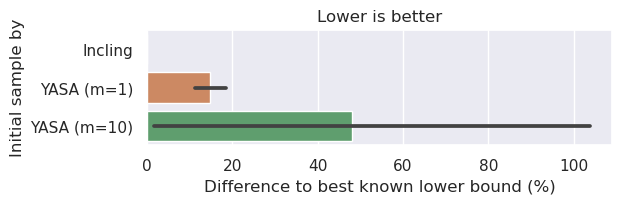

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
f, ax = plt.subplots(figsize=(6, 1.5))
plt.title("Lower is better")
sns.barplot(data=samplns_data.dropna(subset=["gap"]), y="initial_sample_name", x="gap", ax=ax)
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Initial sample by")
plt.show()